In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

####################################
gv =pd.read_csv('Video games.csv')
gv.head()


Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [3]:
# definies les colonnes
####################################
gv.columns


Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [5]:

#description de données
gv.describe()

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  
max       10.570000     82.740000

In [6]:
#totale lignes et colones
gv.shape

(16598, 11)

In [7]:
# découvrir les missing valeus
gv.isnull().sum().sum()

329

In [23]:
#découvrir les missing valeus
gv.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
# fillna les missing values

gv['Year'].fillna(gv['Year'].mean(), inplace=True)

n_elements = len(gv['Publisher'])
print("Nombres d'éléments", n_elements)

#nombre d'elements categorie
print(gv['Publisher'].value_counts())

#replace missing catégorie
gv['Publisher'].fillna('Electronic Arts', inplace=True)
gv.tail()

Nombres d'éléments 16598
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: Publisher, Length: 578, dtype: int64


Rank                                              Name Platform  \
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year     Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
16593  2002.0  Platform       Kemco      0.01      0.00       0.0   
16594  2003.0   Shooter  Infogrames      0.01      0.00       0.0   
16595  2008.0    Racing  Activision      0.00      0.00       0.0   
16596  2010.0    Puzzle    7G//AMES      0.00      0.01       0.0   
16597  2003.0  Platform     Wanadoo      0.01      0.00       0.0   

       Other_Sales  Global_Sales  
16593          0.0          0.01  
16594          0.0          0.01  
16595          0.0          0.01  
16596          0.0          0.01  
16597          0.0          0.01

In [10]:
gv_y  = gv.copy().dropna(subset = ['Year'])
gv_y['Year'] = gv_y['Year'].astype(int)


In [11]:
# découvrir les missing valeus
gv.isna().sum()


Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [13]:

import plotly.express as px

#question 1

fig = px.area(gv, x='Year', y='Global_Sales')
#show chart
fig.show()


In [14]:
#create the histogram
fig = px.histogram(gv, x='Global_Sales', nbins=20)
#show the plot
fig.show()


In [15]:

import plotly.graph_objs as go
import plotly.offline as pyo

#Create a trace using the go.Scatter() function. This will create a scatter plot. Here, x and y arguments are the data to be plotted on the X and Y axis, respectively. The mode argument specifies the type of plot, in this case, markers. The marker argument specifies the color variable, which is based on the Building Type column of the DataFrame.

trace = go.Scatter(x=gv['NA_Sales'], y=gv['EU_Sales'], mode='markers', marker=dict(color=gv['Year']))

#Create a data list. Here, the trace object created in the previous step is added to a list called data.

data = [trace]

#Create a layout object using the go.Layout() function. This will create a layout for the chart, including the title, X and Y axis labels.

layout = go.Layout(title='defference between NA sales et EU sales',
                   xaxis=dict(title='NA_Sales'),
                   yaxis=dict(title='EU_Sales'))
#Create a figure using the go.Figure() function. This combines the data and layout objects to create a complete figure.

fig = go.Figure(data=data, layout=layout)

#Show the plot using pyo.plot() function. This function takes the fig object as an argument and displays the plot in the default web browser.

pyo.plot(fig)


'temp-plot.html'

In [16]:
#Create a trace using the go.Scatter() function. This will create a scatter plot. Here, x and y arguments are the data to be plotted on the X and Y axis, respectively. The mode argument specifies the type of plot, in this case, markers. The marker argument specifies the color variable, which is based on the Building Type column of the DataFrame.

trace = go.Scatter(x=gv['JP_Sales'], y=gv['Other_Sales'], mode='markers', marker=dict(color=gv['Year']))

#Create a data list. Here, the trace object created in the previous step is added to a list called data.

data = [trace]

#Create a layout object using the go.Layout() function. This will create a layout for the chart, including the title, X and Y axis labels.

layout = go.Layout(title='defference between JP sales et OTHERS sales',
                   xaxis=dict(title='JP_Sales'),
                   yaxis=dict(title='Other_Sales'))
#Create a figure using the go.Figure() function. This combines the data and layout objects to create a complete figure.

fig = go.Figure(data=data, layout=layout)

#Show the plot using pyo.plot() function. This function takes the fig object as an argument and displays the plot in the default web browser.

pyo.plot(fig)


'temp-plot.html'

In [32]:
import plotly.express as px

#stack the data

gv = gv.set_index("Year").stack().reset_index().rename(columns={"level_1":" area_chart_years_global_sales", 0:"Global_Sales"})
#create unstacked area chart

fig = px.area(gv, x='Year', y='Global_Sales')
#show chart
fig.show()


C:\Users\publi\AppData\Local\Temp\ipykernel_8272\1113987088.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



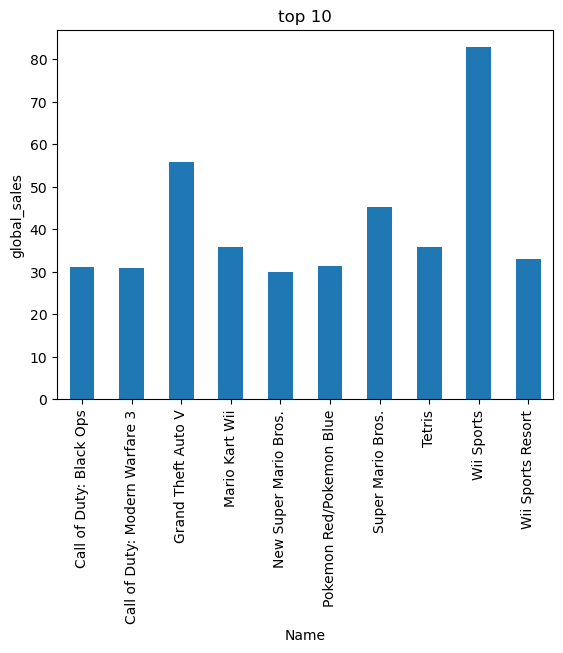

In [17]:
game_df = gv.groupby(['Name'])['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'].sum().reset_index()
game_df = game_df.sort_values(by=['Global_Sales'], ascending=False)

game_df = game_df.reset_index()

del game_df['index']

game_df.drop(game_df.index[10:], inplace=True)
game_total_sales = game_df.Global_Sales.sum()
game_df.groupby(['Name'])['Global_Sales'].sum().plot(kind='bar')
plt.xlabel("Name")
plt.ylabel("global_sales")
plt.title("top 10")
#show chart

plt.show()

In [18]:
# normalisation

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
#numerical_features =['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
#categorial_features = ['Platform', 'Genre', 'Publishe']
transformer = make_column_transformer((StandardScaler(), ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']) )
transformer.fit_transform(gv)


array([[-0.07030647, 50.48050838, 57.13692978, 11.93805759, 44.60608534,
        52.86402505],
       [-3.70288182, 35.28443669,  6.7941883 , 21.76729621,  3.82822442,
        25.53250298],
       [ 0.27565308, 19.08427325, 25.19778483, 12.00272364, 17.29711476,
        22.69002469],
       ...,
       [ 0.27565308, -0.32408584, -0.29020692, -0.25149161, -0.25486439,
        -0.33919426],
       [ 0.62161264, -0.32408584, -0.27041811, -0.25149161, -0.25486439,
        -0.33919426],
       [-0.58924581, -0.31184082, -0.29020692, -0.25149161, -0.25486439,
        -0.33919426]])

In [20]:
#encoding onehotencoder

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
encoder = make_column_transformer((OneHotEncoder(), ['Platform', 'Genre', 'Publisher']) )
gv_1 = encoder.fit_transform(gv)
games_v = pd.DataFrame(gv_1.toarray(), columns=encoder.get_feature_names_out(), dtype=int)
games_v.head()

onehotencoder__Platform_2600  onehotencoder__Platform_3DO  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   onehotencoder__Platform_3DS  onehotencoder__Platform_DC  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   

   onehotencoder__Platform_DS  onehotencoder__Platform_GB  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           1   

   onehotencoder__Platform_GBA  onehotencoder__Platform_GC  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   

   onehotencoder__Platform_GEN  onehotencoder__Platform_GG  ...  \
0                            0                           0  ...   
1                            0                           0  ...   
2                            0                           0  ...   
3                            0                           0  ...   
4                            0                           0  ...   

   onehotencoder__Publisher_Zushi Games  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   onehotencoder__Publisher_bitComposer Games  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   onehotencoder__Publisher_dramatic create  onehotencoder__Publisher_fonfun  \
0                                         0                                0   
1                                         0                                0   
2                                         0                                0   
3                                         0                                0   
4                                         0                                0   

   onehotencoder__Publisher_iWin  onehotencoder__Publisher_id Software  \
0                              0                                     0   
1                              0                                     0   
2                              0                                     0   
3                              0                                     0   
4                              0                                     0   

   onehotencoder__Publisher_imageepoch Inc.  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   onehotencoder__Publisher_inXile Entertainment  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   onehotencoder__Publishe